Fitting with Minuit
Fitting with Minuit


FCN = 562.243032741 
 TOTAL NCALL = 37 
 NCALLS = 37 
 
 
 EDM = 1.79766263943e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,c0,0.275309,0.0631211,,,,,No
1,c1,0.714437,0.0822961,,,,,No


('Chi2=', 562.2430327408341)
('ndf=', 578)


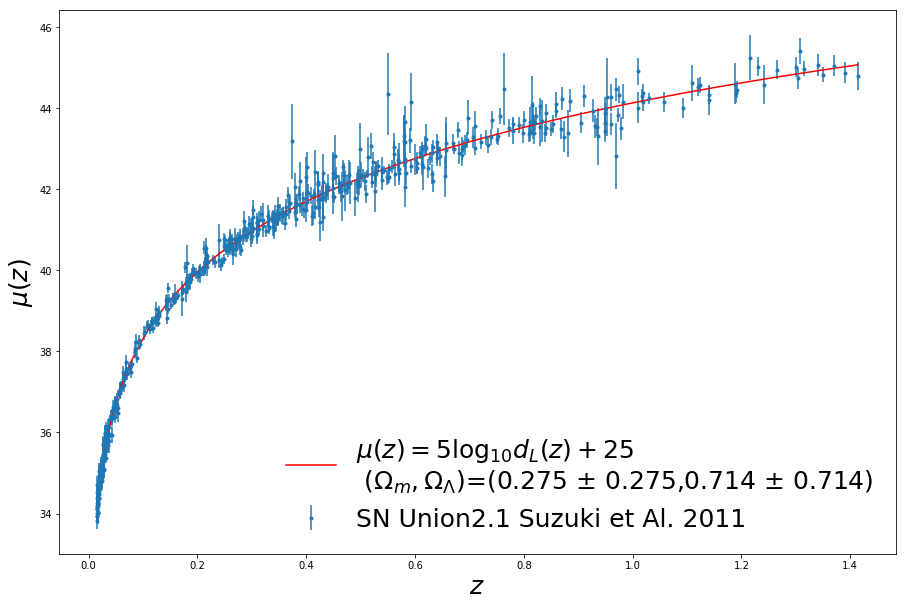

(None, None)

In [3]:
import cosmology,fitting
from numpy import *
from pylab import *


totoSN = loadtxt('data/supernovaUnion2011.txt',usecols=[1,2,3,4])
z_unsorted  = totoSN[:,0]
mu          = totoSN[:,1]
dmu         = totoSN[:,2]

permutter = sorted(range(len(z_unsorted)), key=lambda k: z_unsorted[k])
z  = z_unsorted[permutter]
mu0 =mu[permutter]
dmu0=dmu[permutter]

#def model(x,pars): return pars[0]*log10(x)+pars[1]
#res = fitting.dothefit(z,mu0,dmu0,[1.,40.],functname=model,method='minuit')
#dl = 10**((model(z,res[1])-25 )/ 5.)

def model2(x,pars): return log10( cosmology.get_dist(z,type='dl',params=[pars[0],pars[1],-1,0])/0.7)*5.0+25.
res = fitting.dothefit(z,mu0,dmu0,[.3,.7],functname=model2,method='minuit')


%matplotlib inline
figure(1,figsize=(15,10)),clf()
errorbar(z,mu0,yerr=dmu0,fmt='.', label='SN Union2.1 Suzuki et Al. 2011') #,label='Riess et Al. 1998 High-Z Templates')
xscale('linear'),ylabel('$\mu(z)$',size=25),xlabel('$z$',size=25)
plot(z,model2(z,res[1]),'r-',label='$\mu(z)=5\log_{10} d_{L}(z)+25$ \n $(\Omega_{m},\Omega_{\Lambda})$=(%0.3f $\pm$ %0.3f,%0.3f $\pm$ %0.3f)'%(res[1][0],res[1][0],res[1][1],res[1][1]) )
legend(loc=4,frameon=False,numpoints=1,fontsize=25)
draw(),show()